In [ ]:
# Clone YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00

In [ ]:
import kagglehub

# Download ExDark dataset (latest version)
path = kagglehub.dataset_download("rociomcomin/object-detection-exdark")
print("✅ Dataset downloaded to:", path)


100%|██████████| 1.39G/1.39G [01:05<00:00, 22.7MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/rociomcomin/object-detection-exdark/versions/1


In [ ]:
import os

# List all top-level files and folders
for item in os.listdir(path):
    print("", item)


 ExDark_Annno
 ExDark


In [ ]:
import os

base_path = path  # kagglehub download path
exdark_path = os.path.join(base_path, "ExDark")
anno_path = os.path.join(base_path, "ExDark_Annno")

print("📁 ExDark contains:")
print(os.listdir(exdark_path)[:5])

print("\n📁 ExDark_Annno contains:")
print(os.listdir(anno_path)[:5])


📁 ExDark contains:
['Bus', 'Chair', 'Bicycle', 'Boat', 'Bottle']

📁 ExDark_Annno contains:
['Bus', 'Chair', 'Bicycle', 'Boat', 'Bottle']


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

input_dir = os.path.join(path, "ExDark")
output_dir = "/content/processed_ExDark"
os.makedirs(output_dir, exist_ok=True)

def enhance_image(img, gamma=1.5):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))

    img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img, table)

# Go through each class folder
for class_folder in tqdm(os.listdir(input_dir)):
    class_path = os.path.join(input_dir, class_folder)
    for img_file in os.listdir(class_path):
        if img_file.endswith('.jpg'):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            processed = enhance_image(img)
            cv2.imwrite(os.path.join(output_dir, img_file), processed)


100%|██████████| 12/12 [02:24<00:00, 12.00s/it]


In [ ]:
from glob import glob
from tqdm import tqdm
import os
import cv2
import numpy as np

input_dir = os.path.join(path, "ExDark")
output_dir = "/content/processed_ExDark"
os.makedirs(output_dir, exist_ok=True)

def enhance_image(img, gamma=1.5):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

# Get ALL image paths (recursive glob)
image_paths = glob(os.path.join(input_dir, "*", "*.jpg"))

print(f"🔍 Total images found: {len(image_paths)}")

# Process each image with tqdm
for img_path in tqdm(image_paths, desc="Enhancing images"):
    img = cv2.imread(img_path)
    if img is None:
        continue
    enhanced = enhance_image(img)
    out_name = os.path.basename(img_path)
    cv2.imwrite(os.path.join(output_dir, out_name), enhanced)


🔍 Total images found: 6195


Enhancing images: 100%|██████████| 6195/6195 [02:24<00:00, 42.81it/s]


In [ ]:
import os
import cv2

input_ann_dir = os.path.join(path, "ExDark_Annno")
input_img_dir = "/content/processed_ExDark"
output_label_dir = "/content/yolo_labels"
os.makedirs(output_label_dir, exist_ok=True)

class_map = {}  # ClassName -> ClassID

# Build image shape map first for safety
image_shapes = {}
for fname in os.listdir(input_img_dir):
    img_path = os.path.join(input_img_dir, fname)
    img = cv2.imread(img_path)
    if img is not None:
        image_shapes[fname] = img.shape[:2]  # (H, W)

# Process annotations
for class_folder in os.listdir(input_ann_dir):
    class_path = os.path.join(input_ann_dir, class_folder)
    if class_folder not in class_map:
        class_map[class_folder] = len(class_map)

    for txt_file in os.listdir(class_path):
        ann_path = os.path.join(class_path, txt_file)
        image_file = txt_file.replace(".txt", ".jpg")

        if image_file not in image_shapes:
            continue  # Skip missing or unprocessed image

        H, W = image_shapes[image_file]

        with open(ann_path, 'r') as f:
            line = f.readline().strip()
            if not line:
                continue
            parts = line.strip().split()
            cls_name, x, y, w, h = parts[0], *map(int, parts[1:])
            cls_id = class_map[cls_name]

            x_center = (int(x) + int(w)/2) / W
            y_center = (int(y) + int(h)/2) / H
            w_norm = int(w) / W
            h_norm = int(h) / H

            # Save to label file
            with open(os.path.join(output_label_dir, txt_file), 'w') as out:
                out.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")


In [ ]:
with open("/content/classes.txt", 'w') as f:
    for class_name in sorted(class_map, key=lambda x: class_map[x]):
        f.write(class_name + '\n')


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

img_dir = "/content/processed_ExDark"
label_dir = "/content/yolo_labels"
base_dir = "/content/yolo_dataset"

# Create required folders
for split in ['train', 'val']:
    os.makedirs(os.path.join(base_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'labels', split), exist_ok=True)

# Get list of image files
all_images = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]

# Split train / val
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

# Move files
def move_files(file_list, split):
    for fname in file_list:
        # image
        shutil.copy(os.path.join(img_dir, fname),
                    os.path.join(base_dir, 'images', split, fname))
        # label
        label_file = fname.replace('.jpg', '.txt')
        src_label_path = os.path.join(label_dir, label_file)
        dst_label_path = os.path.join(base_dir, 'labels', split, label_file)
        if os.path.exists(src_label_path):
            shutil.copy(src_label_path, dst_label_path)

move_files(train_imgs, 'train')
move_files(val_imgs, 'val')

print(f"✅ Train images: {len(train_imgs)}")
print(f"✅ Val images: {len(val_imgs)}")


✅ Train images: 4956
✅ Val images: 1239


In [ ]:
# Read class names
class_list = open("/content/classes.txt").read().splitlines()

# Write data.yaml
with open('/content/data.yaml', 'w') as f:
    f.write(f"path: /content/yolo_dataset\n")
    f.write(f"train: images/train\n")
    f.write(f"val: images/val\n")
    f.write(f"nc: {len(class_list)}\n")
    f.write(f"names: {class_list}\n")


In [ ]:
import torch
print(" CUDA Available:", torch.cuda.is_available())
print(" GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


✅ CUDA Available: True
🖥️ GPU Name: Tesla T4


In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"


train: weights=yolov5m.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exdark_pytorch_train, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False, batch=32
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,

AssertionError: [34m[1mtrain: [0mNo labels found in /content/yolo_dataset/labels/train.cache, can not start training. See https://docs.ultralytics.com/yolov5/tutorials/train_custom_data

In [ ]:
import os

processed_img_dir = "/content/processed_ExDark"
all_imgs = os.listdir(processed_img_dir)
jpgs = [f for f in all_imgs if f.endswith(".jpg")]
print("🖼️ Total processed JPGs:", len(jpgs))
print("Example images:", jpgs[:5])


🖼️ Total processed JPGs: 6195
Example images: ['2015_04780.jpg', '2015_00834.jpg', '2015_00528.jpg', '2015_00433.jpg', '2015_07236.jpg']


In [ ]:
import os

ann_dir = os.path.join(path, "ExDark_Annno")
all_ann_files = []
for class_folder in os.listdir(ann_dir):
    class_path = os.path.join(ann_dir, class_folder)
    for f in os.listdir(class_path):
        if f.endswith(".txt"):
            all_ann_files.append(f)

print("📄 Total annotation files found:", len(all_ann_files))
print("Example annotation filenames:", all_ann_files[:5])


📄 Total annotation files found: 7363
Example annotation filenames: ['2015_02187.jpg.txt', '2015_02253.JPG.txt', '2015_02225.jpg.txt', '2015_02179.jpg.txt', '2015_01962.jpg.txt']


In [ ]:
image_basenames = set(image_map.keys())
missed = []

for class_folder in os.listdir(input_ann_dir):
    class_path = os.path.join(input_ann_dir, class_folder)
    for ann_file in os.listdir(class_path):
        if not ann_file.lower().endswith(".txt"):
            continue

        base = ann_file.lower().replace(".jpg.txt", "").replace(".png.txt", "").replace(".jpeg.txt", "").strip()
        if base not in image_basenames:
            missed.append(base)

print(f"🔍 Missed {len(missed)} annotations that didn’t match images")
print("🔍 Sample missed base names:", missed[:10])
print("🔍 Sample image_map keys:", list(image_basenames)[:10])


🔍 Missed 1168 annotations that didn’t match images
🔍 Sample missed base names: ['2015_02253', '2015_02249', '2015_02263', '2015_02262', '2015_02239', '2015_02261', '2015_01882', '2015_02234', '2015_02354', '2015_02257']
🔍 Sample image_map keys: ['2015_02450', '2015_02474', '2015_02084', '2015_04743', '2015_03884', '2015_03111', '2015_04307', '2015_05108', '2015_00335', '2015_03611']


In [ ]:
!ls /root/.cache/kagglehub/datasets/rociomcomin/object-detection-exdark/versions/1/ExDark_Annno/*/*.txt | grep '2015_00834' || true
!cat /root/.cache/kagglehub/datasets/rociomcomin/object-detection-exdark/versions/1/ExDark_Annno/*/2015_00834.*.txt || echo "empty"


/root/.cache/kagglehub/datasets/rociomcomin/object-detection-exdark/versions/1/ExDark_Annno/Boat/2015_00834.jpg.txt
% bbGt version=3
Boat 118 244 99 55 0 0 0 0 0 0 0
Boat 358 256 80 50 0 0 0 0 0 0 0


In [ ]:
import os
import cv2

input_ann_dir = os.path.join(path, "ExDark_Annno")
processed_img_dir = "/content/processed_ExDark"
output_label_dir = "/content/yolo_labels"
os.makedirs(output_label_dir, exist_ok=True)

# Map base image name → full name + shape
image_map = {}
for fname in os.listdir(processed_img_dir):
    if fname.lower().endswith(".jpg"):
        base = os.path.splitext(fname)[0]
        img_path = os.path.join(processed_img_dir, fname)
        img = cv2.imread(img_path)
        if img is not None:
            image_map[base] = {"name": fname, "shape": img.shape[:2]}  # (H, W)

print(f"🖼️ Found {len(image_map)} processed images.")

class_map = {}
total_written = 0
empty_files = 0
skipped = 0

for class_folder in os.listdir(input_ann_dir):
    class_path = os.path.join(input_ann_dir, class_folder)
    if class_folder not in class_map:
        class_map[class_folder] = len(class_map)

    for ann_file in os.listdir(class_path):
        if not ann_file.lower().endswith(".txt"):
            continue

        base = ann_file.lower().replace(".jpg.txt", "").replace(".jpeg.txt", "").replace(".png.txt", "").strip()

        if base not in image_map:
            skipped += 1
            continue

        img_info = image_map[base]
        img_name = img_info["name"]
        H, W = img_info["shape"]
        cls_id = class_map[class_folder]
        label_lines = []

        ann_path = os.path.join(class_path, ann_file)
        with open(ann_path, "r") as f:
            for line in f:
                line = line.strip()
                if line.startswith('%') or line == "":
                    continue
                parts = line.split()
                if len(parts) < 5:
                    continue
                try:
                    # Only use first 5 fields
                    _, x, y, w, h = parts[0], *map(int, parts[1:5])
                    x_center = (x + w / 2) / W
                    y_center = (y + h / 2) / H
                    w_norm = w / W
                    h_norm = h / H
                    label_lines.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}")
                except:
                    continue  # bad line

        if label_lines:
            label_path = os.path.join(output_label_dir, img_name.replace(".jpg", ".txt"))
            with open(label_path, "w") as out:
                out.write("\n".join(label_lines))
            total_written += 1
        else:
            empty_files += 1

print(f"✅ Labels successfully written for {total_written} images.")
print(f"⚠️ Empty annotations: {empty_files}")
print(f"⛔ Skipped due to missing images: {skipped}")


🖼️ Found 6195 processed images.
✅ Labels successfully written for 6194 images.
⚠️ Empty annotations: 1
⛔ Skipped due to missing images: 1168


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from glob import glob

# Paths
img_dir = "/content/processed_ExDark"
label_dir = "/content/yolo_labels"
output_dir = "/content/yolo_dataset"

train_img_dir = os.path.join(output_dir, "images/train")
val_img_dir = os.path.join(output_dir, "images/val")
train_lbl_dir = os.path.join(output_dir, "labels/train")
val_lbl_dir = os.path.join(output_dir, "labels/val")

# Create dirs
for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# Get base names of labeled images
all_imgs = [os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith(".txt")]

# Split
train_files, val_files = train_test_split(all_imgs, test_size=0.2, random_state=42)

# Copy files
for base in train_files:
    shutil.copy(os.path.join(img_dir, base + ".jpg"), train_img_dir)
    shutil.copy(os.path.join(label_dir, base + ".txt"), train_lbl_dir)

for base in val_files:
    shutil.copy(os.path.join(img_dir, base + ".jpg"), val_img_dir)
    shutil.copy(os.path.join(label_dir, base + ".txt"), val_lbl_dir)

print(f"✅ Train/Val split done — {len(train_files)} train / {len(val_files)} val")


✅ Train/Val split done — 4955 train / 1239 val


In [ ]:
class_names = list(class_map.keys())

data_yaml = f"""
train: {output_dir}/images/train
val: {output_dir}/images/val

nc: {len(class_names)}
names: {class_names}
"""

with open("exdark_data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ YOLOv5 data.yaml written!")


✅ YOLOv5 data.yaml written!


In [ ]:
# Read YOLO labels and convert to absolute x1,y1,x2,y2 format
import os
import cv2

IMG_DIR = "/content/processed_ExDark"
LBL_DIR = "/content/yolo_labels"

samples = []

for fname in os.listdir(LBL_DIR):
    if not fname.endswith(".txt"):
        continue

    img_name = fname.replace(".txt", ".jpg")
    img_path = os.path.join(IMG_DIR, img_name)
    label_path = os.path.join(LBL_DIR, fname)

    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    boxes = []
    labels = []

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x_c, y_c, bw, bh = map(float, parts)
            x1 = (x_c - bw / 2) * w
            y1 = (y_c - bh / 2) * h
            x2 = (x_c + bw / 2) * w
            y2 = (y_c + bh / 2) * h
            boxes.append([x1, y1, x2, y2])
            labels.append(int(cls))

    if boxes:
        samples.append({
            "image": img_path,
            "boxes": boxes,
            "labels": labels
        })

print(f"✅ Parsed {len(samples)} labeled images")


✅ Parsed 6194 labeled images


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as T

class YOLODataset(Dataset):
    def __init__(self, img_dir, label_dir, img_size=640, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.img_size = img_size
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
        self.transform = transform or T.Compose([
            T.Resize((img_size, img_size)),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(".jpg", ".txt"))

        # Load image
        img = Image.open(img_path).convert("RGB")
        w, h = img.size
        img = self.transform(img)

        # Load labels
        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    cls, x, y, bw, bh = map(float, parts)
                    # Convert from YOLO format to [x1, y1, x2, y2]
                    x1 = (x - bw / 2) * self.img_size
                    y1 = (y - bh / 2) * self.img_size
                    x2 = (x + bw / 2) * self.img_size
                    y2 = (y + bh / 2) * self.img_size
                    boxes.append([x1, y1, x2, y2])
                    labels.append(int(cls))

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64)
        }

        return img, target


In [ ]:
!pip install ultralytics --upgrade


In [ ]:
from ultralytics import YOLO

# Load pretrained YOLOv5s and modify for 10 classes
model = YOLO('yolov5s.pt')
model.model.nc = 10  # Set number of classes
model.model.names = [str(i) for i in range(10)]  # Optional: class names


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:03<00:00, 4.83MB/s]


In [ ]:
model.train(
    data='/content/data.yaml',  # Your dataset YAML
    epochs=50,
    imgsz=640,
    batch=16,
    device=0  # or 'cpu'
)


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

100%|██████████| 5.35M/5.35M [00:00<00:00, 273MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1180.3±641.9 MB/s, size: 680.0 KB)


train: Scanning /content/yolo_dataset/labels/train... 4955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4955/4955 [00:02<00:00, 2044.79it/s]


train: New cache created: /content/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±1.2 ms, read: 961.2±655.4 MB/s, size: 125.5 KB)


val: Scanning /content/yolo_dataset/labels/val... 1239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1239/1239 [00:01<00:00, 800.93it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.8G      1.422      2.558      1.369         76        640: 100%|██████████| 310/310 [02:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.47it/s]


                   all       1239       3975      0.422      0.416      0.371      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.41G      1.486      2.211       1.43         54        640: 100%|██████████| 310/310 [01:54<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.84it/s]

                   all       1239       3975      0.402      0.356      0.334      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.44G      1.545      2.232      1.473         85        640: 100%|██████████| 310/310 [01:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.76it/s]


                   all       1239       3975      0.433       0.35      0.314      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.47G      1.563       2.21      1.495         98        640: 100%|██████████| 310/310 [01:50<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.81it/s]


                   all       1239       3975      0.376      0.372      0.323      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       6.5G      1.541      2.153      1.479         61        640: 100%|██████████| 310/310 [01:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.81it/s]


                   all       1239       3975      0.411      0.373      0.331      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.53G       1.52      2.068      1.459         58        640: 100%|██████████| 310/310 [01:52<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.79it/s]


                   all       1239       3975      0.438      0.424      0.392      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.56G      1.486      2.001      1.443         51        640: 100%|██████████| 310/310 [01:53<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.49it/s]


                   all       1239       3975      0.457      0.431      0.401      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.59G      1.474      1.956      1.428         53        640: 100%|██████████| 310/310 [01:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.71it/s]


                   all       1239       3975      0.502       0.41      0.431      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.62G      1.438      1.884      1.409         85        640: 100%|██████████| 310/310 [01:54<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.46it/s]


                   all       1239       3975      0.475      0.441      0.427      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.66G      1.427      1.835      1.401         70        640: 100%|██████████| 310/310 [01:52<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.86it/s]


                   all       1239       3975      0.522      0.459      0.469      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.69G      1.414      1.782      1.391         90        640: 100%|██████████| 310/310 [01:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.61it/s]


                   all       1239       3975      0.501      0.456      0.463      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.72G      1.392      1.728      1.376         61        640: 100%|██████████| 310/310 [01:52<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.73it/s]


                   all       1239       3975       0.52      0.461      0.464      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.75G      1.391      1.749      1.375         64        640: 100%|██████████| 310/310 [01:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.63it/s]


                   all       1239       3975      0.545      0.505      0.509      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.78G      1.372      1.662      1.359         70        640: 100%|██████████| 310/310 [01:56<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.77it/s]


                   all       1239       3975      0.522      0.458      0.462      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.81G      1.349      1.636      1.349         37        640: 100%|██████████| 310/310 [01:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.67it/s]


                   all       1239       3975      0.579      0.465      0.509      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.85G      1.339      1.583      1.336         90        640: 100%|██████████| 310/310 [01:56<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.77it/s]

                   all       1239       3975      0.539      0.487      0.499      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.88G      1.331      1.566      1.329         71        640: 100%|██████████| 310/310 [01:56<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.75it/s]

                   all       1239       3975      0.555      0.505       0.51      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.91G      1.322      1.543      1.331         80        640: 100%|██████████| 310/310 [01:55<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.65it/s]


                   all       1239       3975      0.558      0.512      0.511      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.94G      1.296      1.505      1.312         95        640: 100%|██████████| 310/310 [01:52<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.79it/s]


                   all       1239       3975      0.581      0.507      0.524      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.97G      1.303      1.501      1.317         71        640: 100%|██████████| 310/310 [01:51<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.84it/s]


                   all       1239       3975      0.595      0.518      0.545      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         7G      1.296      1.456      1.303         62        640: 100%|██████████| 310/310 [01:52<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.63it/s]


                   all       1239       3975      0.585      0.505      0.534      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.03G      1.276      1.429       1.29         61        640: 100%|██████████| 310/310 [01:56<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.80it/s]

                   all       1239       3975      0.573      0.518      0.529      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.07G      1.271      1.396      1.287         54        640: 100%|██████████| 310/310 [01:53<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.65it/s]

                   all       1239       3975      0.575      0.505      0.536      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       7.1G      1.262      1.371      1.282         59        640: 100%|██████████| 310/310 [01:55<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.82it/s]

                   all       1239       3975      0.592      0.522      0.544      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.13G      1.245      1.334      1.264         72        640: 100%|██████████| 310/310 [01:54<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.82it/s]


                   all       1239       3975      0.611      0.515      0.548      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.16G      1.239      1.303       1.27         98        640: 100%|██████████| 310/310 [01:58<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.76it/s]


                   all       1239       3975      0.605      0.527      0.554      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.19G      1.232      1.296      1.264         89        640: 100%|██████████| 310/310 [01:56<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.62it/s]

                   all       1239       3975      0.605      0.518      0.542      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.22G      1.223      1.262      1.257         54        640: 100%|██████████| 310/310 [01:57<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.74it/s]


                   all       1239       3975      0.588      0.528      0.548      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.25G      1.212      1.244      1.248         55        640: 100%|██████████| 310/310 [01:56<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.68it/s]


                   all       1239       3975      0.621      0.525      0.555      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.29G      1.194      1.223      1.239         82        640: 100%|██████████| 310/310 [01:56<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.64it/s]


                   all       1239       3975      0.613      0.525      0.558      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.32G      1.192      1.186      1.237         80        640: 100%|██████████| 310/310 [01:55<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.71it/s]


                   all       1239       3975      0.612      0.527      0.562      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.35G      1.183      1.172      1.231         62        640: 100%|██████████| 310/310 [01:53<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.89it/s]


                   all       1239       3975      0.608      0.538      0.573      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.99G      1.176      1.144      1.226         62        640: 100%|██████████| 310/310 [01:51<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.73it/s]


                   all       1239       3975      0.628      0.515      0.559      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.57G      1.164      1.115      1.219         48        640: 100%|██████████| 310/310 [01:53<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.73it/s]


                   all       1239       3975      0.616      0.527      0.557      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.57G      1.153      1.096      1.209         58        640: 100%|██████████| 310/310 [01:52<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.61it/s]


                   all       1239       3975      0.608       0.55      0.569      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.57G      1.152      1.086      1.207         69        640: 100%|██████████| 310/310 [01:52<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.82it/s]

                   all       1239       3975      0.633      0.545      0.577      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.57G      1.144      1.058      1.196         50        640: 100%|██████████| 310/310 [01:52<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.77it/s]


                   all       1239       3975      0.642       0.52       0.56      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.57G      1.133      1.049      1.196         71        640: 100%|██████████| 310/310 [01:56<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.84it/s]


                   all       1239       3975      0.629       0.53      0.568      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.57G      1.127      1.032      1.195         63        640: 100%|██████████| 310/310 [01:53<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.92it/s]


                   all       1239       3975      0.623      0.534      0.568      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.57G      1.117      1.015      1.185         65        640: 100%|██████████| 310/310 [01:55<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.80it/s]

                   all       1239       3975      0.631      0.524      0.564       0.35


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.59G      1.074     0.8285       1.16         19        640: 100%|██████████| 310/310 [01:52<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.82it/s]


                   all       1239       3975       0.62      0.531      0.561      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.62G      1.052     0.7719      1.144         33        640: 100%|██████████| 310/310 [01:51<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.92it/s]


                   all       1239       3975      0.635      0.533      0.571      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.65G      1.042     0.7482      1.142         40        640: 100%|██████████| 310/310 [01:51<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.81it/s]


                   all       1239       3975      0.616      0.545      0.562      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.69G      1.023     0.7268      1.126         20        640: 100%|██████████| 310/310 [01:54<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.86it/s]


                   all       1239       3975      0.637      0.537      0.568      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.71G       1.02     0.7091      1.125         20        640: 100%|██████████| 310/310 [01:50<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.84it/s]

                   all       1239       3975      0.647      0.529      0.569      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.75G      1.007     0.6964      1.117         21        640: 100%|██████████| 310/310 [01:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.60it/s]


                   all       1239       3975       0.65      0.532      0.568      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.78G     0.9924     0.6802       1.11         28        640: 100%|██████████| 310/310 [01:48<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.92it/s]


                   all       1239       3975      0.625      0.549      0.568      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.81G     0.9861     0.6616      1.104         26        640: 100%|██████████| 310/310 [01:48<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]

                   all       1239       3975       0.64      0.538      0.571      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.84G     0.9799     0.6507      1.101         35        640: 100%|██████████| 310/310 [01:49<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]


                   all       1239       3975       0.66       0.53      0.571      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.87G     0.9676     0.6413      1.094         22        640: 100%|██████████| 310/310 [01:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.80it/s]


                   all       1239       3975      0.654      0.533       0.57      0.355

50 epochs completed in 1.786 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,116,180 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.54it/s]


                   all       1239       3975      0.633      0.546      0.577      0.357
                   Bus         89        321      0.768      0.626      0.722      0.488
                 Chair        105        323      0.431      0.372      0.391      0.253
               Bicycle        126        461      0.762      0.555      0.644      0.412
                  Boat        118        310      0.744      0.655      0.718      0.371
                Bottle         93        416      0.548      0.507      0.514      0.306
                 Table         90        438      0.459       0.36      0.336      0.199
                   Cup         81        275       0.56      0.491      0.505      0.313
                   Dog        120        223      0.597      0.534      0.563      0.383
                People         97        383      0.531      0.663      0.561      0.344
                   Car        107        300      0.794      0.547      0.679      0.457
             Motorbik

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce5c52ddf50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/yolov5_exdark_best.pt
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


cp: cannot create regular file '/content/drive/MyDrive/yolov5_exdark_best.pt': No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics.utils.plotting import plot_results

# This reads results.csv from training and generates a combined plot
plot_results(file='runs/detect/train/results.csv')


In [ ]:
!zip -r runs_yolov5.zip runs/



updating: runs/ (stored 0%)
updating: runs/train/ (stored 0%)
updating: runs/train/exdark_pytorch_train/ (stored 0%)
updating: runs/train/exdark_pytorch_train/opt.yaml (deflated 50%)
updating: runs/train/exdark_pytorch_train/events.out.tfevents.1751436064.5d423d12f114.755.0 (deflated 9%)
updating: runs/train/exdark_pytorch_train/hyp.yaml (deflated 45%)
updating: runs/train/exdark_pytorch_train/weights/ (stored 0%)
updating: runs/exdark_yolo/ (stored 0%)
updating: runs/exdark_yolo/events.out.tfevents.1751437995.5d423d12f114.755.2 (deflated 9%)
updating: runs/exdark_yolo/events.out.tfevents.1751437922.5d423d12f114.755.1 (deflated 9%)
updating: runs/exdark_yolo/events.out.tfevents.1751438137.5d423d12f114.755.4 (deflated 9%)
updating: runs/exdark_yolo/events.out.tfevents.1751438159.5d423d12f114.755.5 (deflated 9%)
updating: runs/exdark_yolo/events.out.tfevents.1751438107.5d423d12f114.755.3 (deflated 9%)
updating: runs/exdark_yolo/events.out.tfevents.1751438246.5d423d12f114.755.7 (deflated 

In [ ]:
from google.colab import files
files.download("runs_yolov5.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
model.val(data="/content/data.yaml", split='val')


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,116,180 parameters, 0 gradients, 23.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1553.9±638.6 MB/s, size: 150.2 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 1239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1239/1239 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:19<00:00,  4.00it/s]


                   all       1239       3975      0.634      0.546      0.578      0.357
                   Bus         89        321      0.771      0.626      0.721      0.488
                 Chair        105        323      0.427      0.368       0.39       0.25
               Bicycle        126        461      0.763       0.56      0.644      0.411
                  Boat        118        310      0.736      0.658      0.719      0.372
                Bottle         93        416      0.552      0.507      0.515      0.305
                 Table         90        438      0.454      0.354      0.334      0.199
                   Cup         81        275      0.568      0.491      0.508      0.316
                   Dog        120        223      0.602      0.534      0.567      0.385
                People         97        383      0.532      0.661      0.561      0.343
                   Car        107        300      0.794       0.55      0.676      0.454
             Motorbik

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce5c406d050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
# Create test folders
!mkdir -p /content/yolo_dataset/images/test
!mkdir -p /content/yolo_dataset/labels/test

# Copy 100 images & labels from val to test (adjust as needed)
!cp /content/yolo_dataset/images/val/* /content/yolo_dataset/images/test/
!cp /content/yolo_dataset/labels/val/* /content/yolo_dataset/labels/test/


In [ ]:
test_yaml = """
path: /content/yolo_dataset
train: images/train
val: images/val
test: images/test

nc: 10
names: ['Bicycle', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cup', 'Dog', 'People']
"""

with open("test_data.yaml", "w") as f:
    f.write(test_yaml)


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

# Evaluate and visualize predictions
results = model.predict(source="/content/yolo_dataset/images/test", save=True, conf=0.25)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1239 /content/yolo_dataset/images/test/2015_00009.jpg: 480x640 5 Bicycles, 228.2ms
image 2/1239 /content/yolo_dataset/images/test/2015_00017.jpg: 640x448 1 Bicycle, 137.3ms
image 3/1239 /content/yolo_dataset/images/test/2015_00020.jpg: 384x640 1 Bicycle, 79.9ms
image 4/1239 /content/yolo_dataset/images/test/2015_00027.jpg: 480x640 5 Bicycles, 23.0ms
image 5/1239 /content/yolo_dataset/images/test/2015_00032.jpg: 448x640 2 Bicycles, 1 People, 131

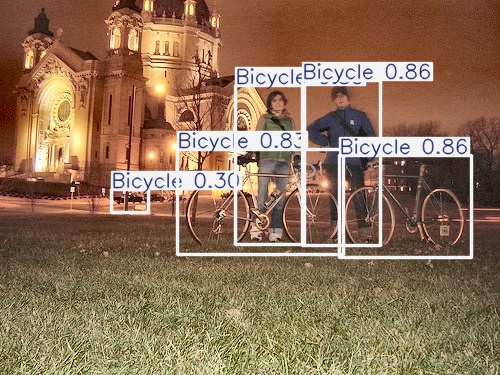

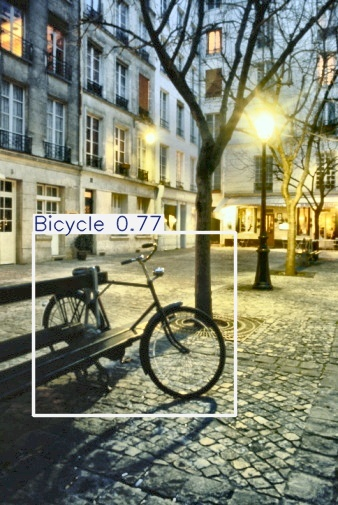

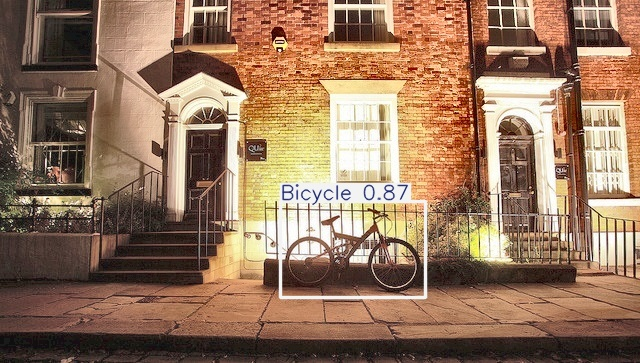

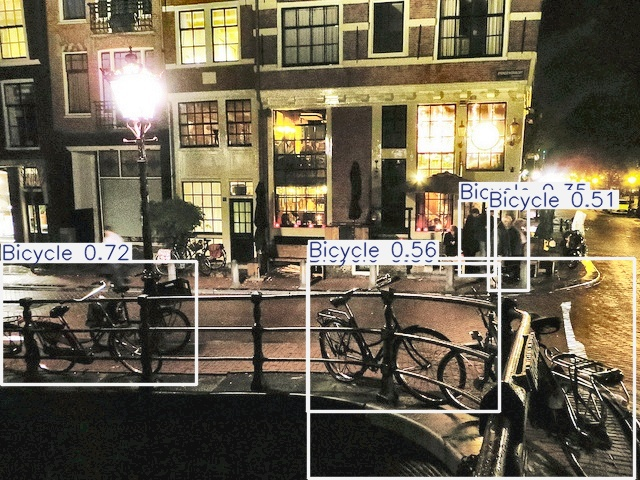

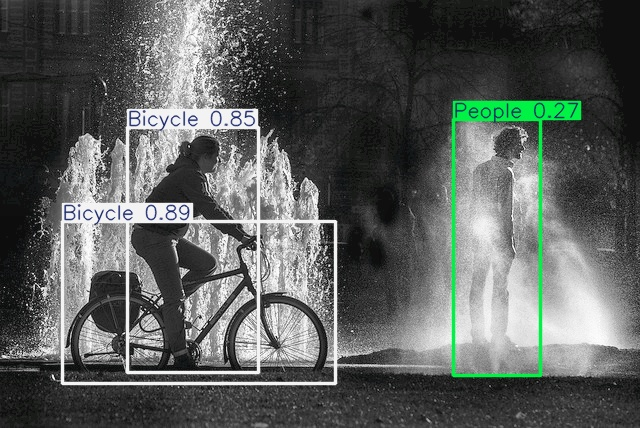

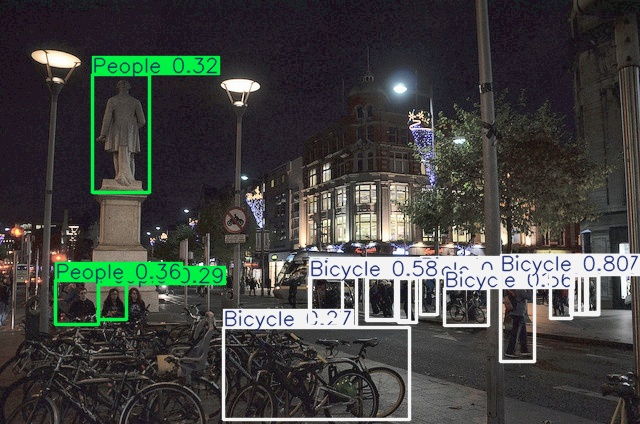

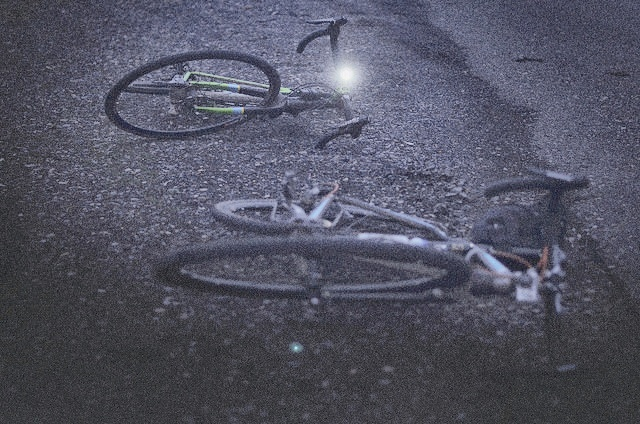

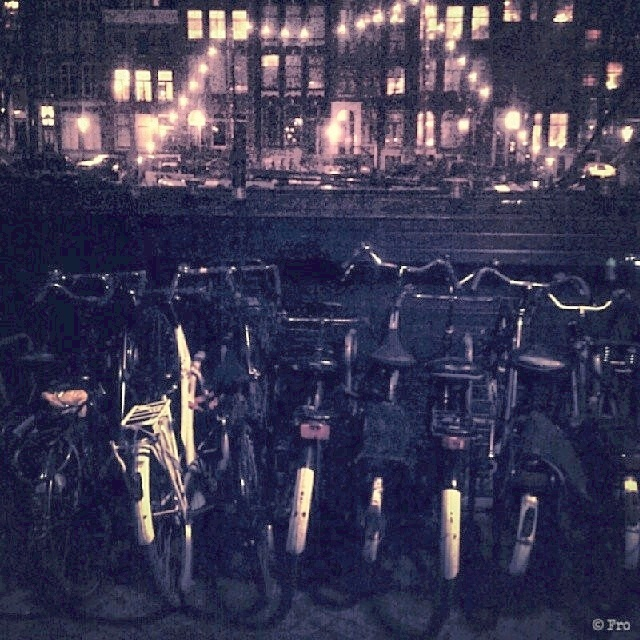

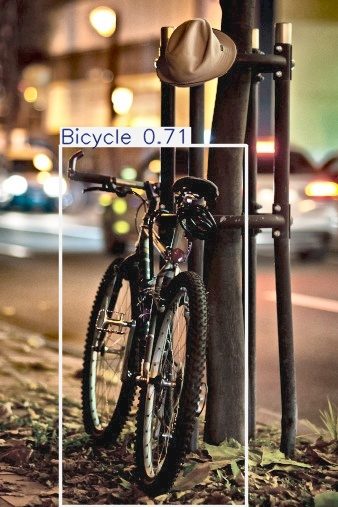

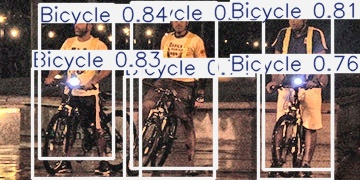

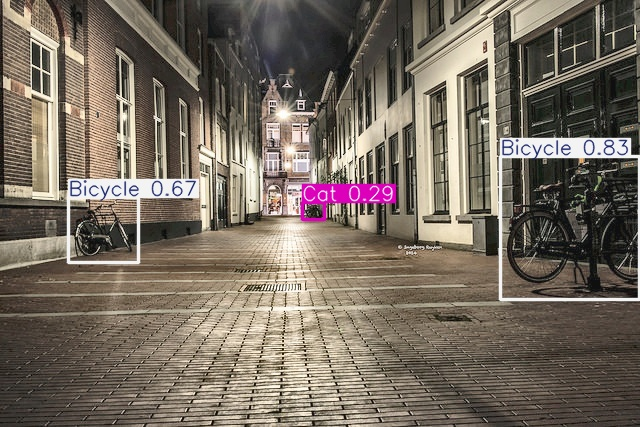

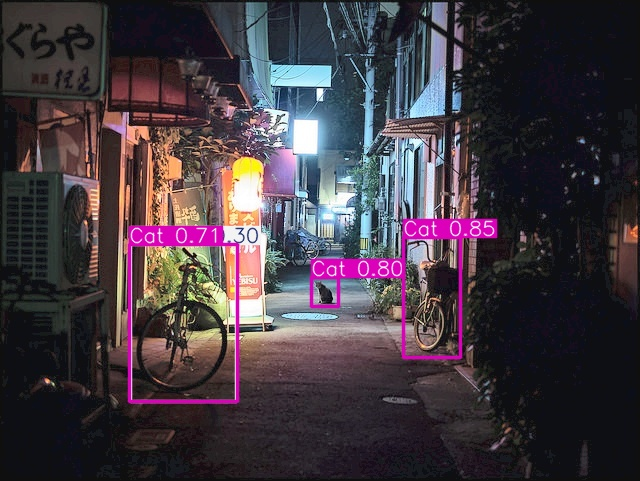

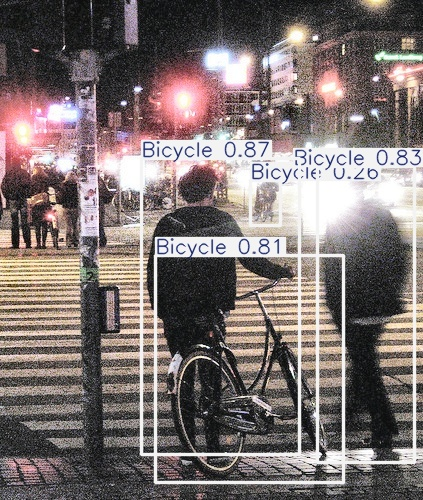

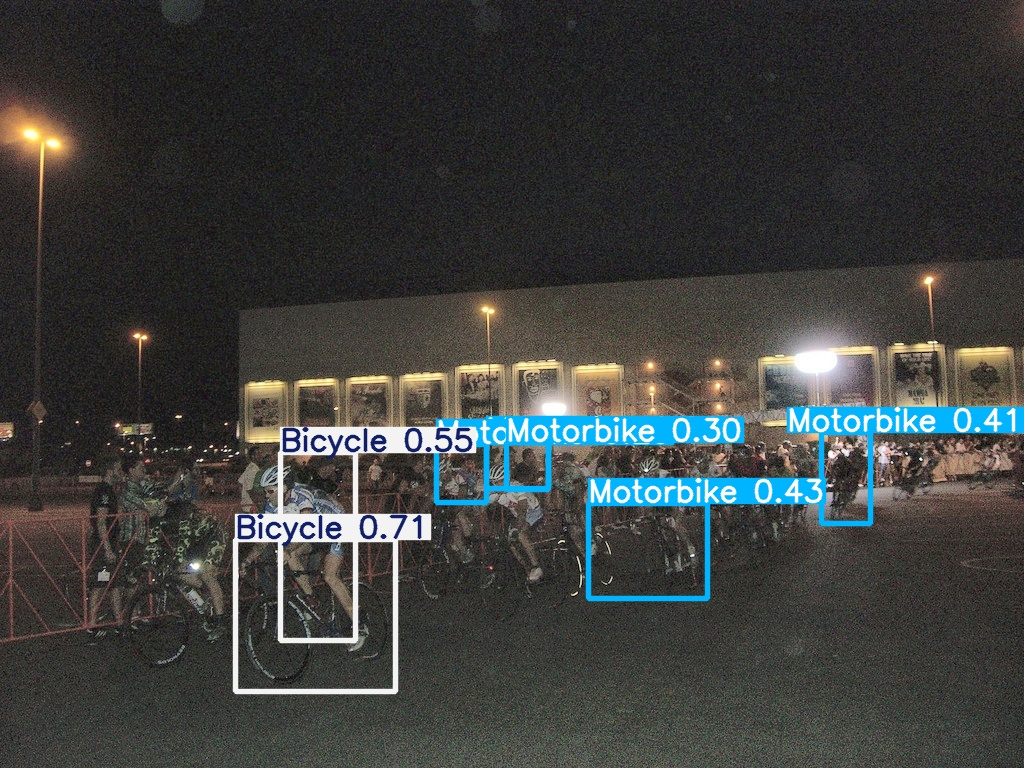

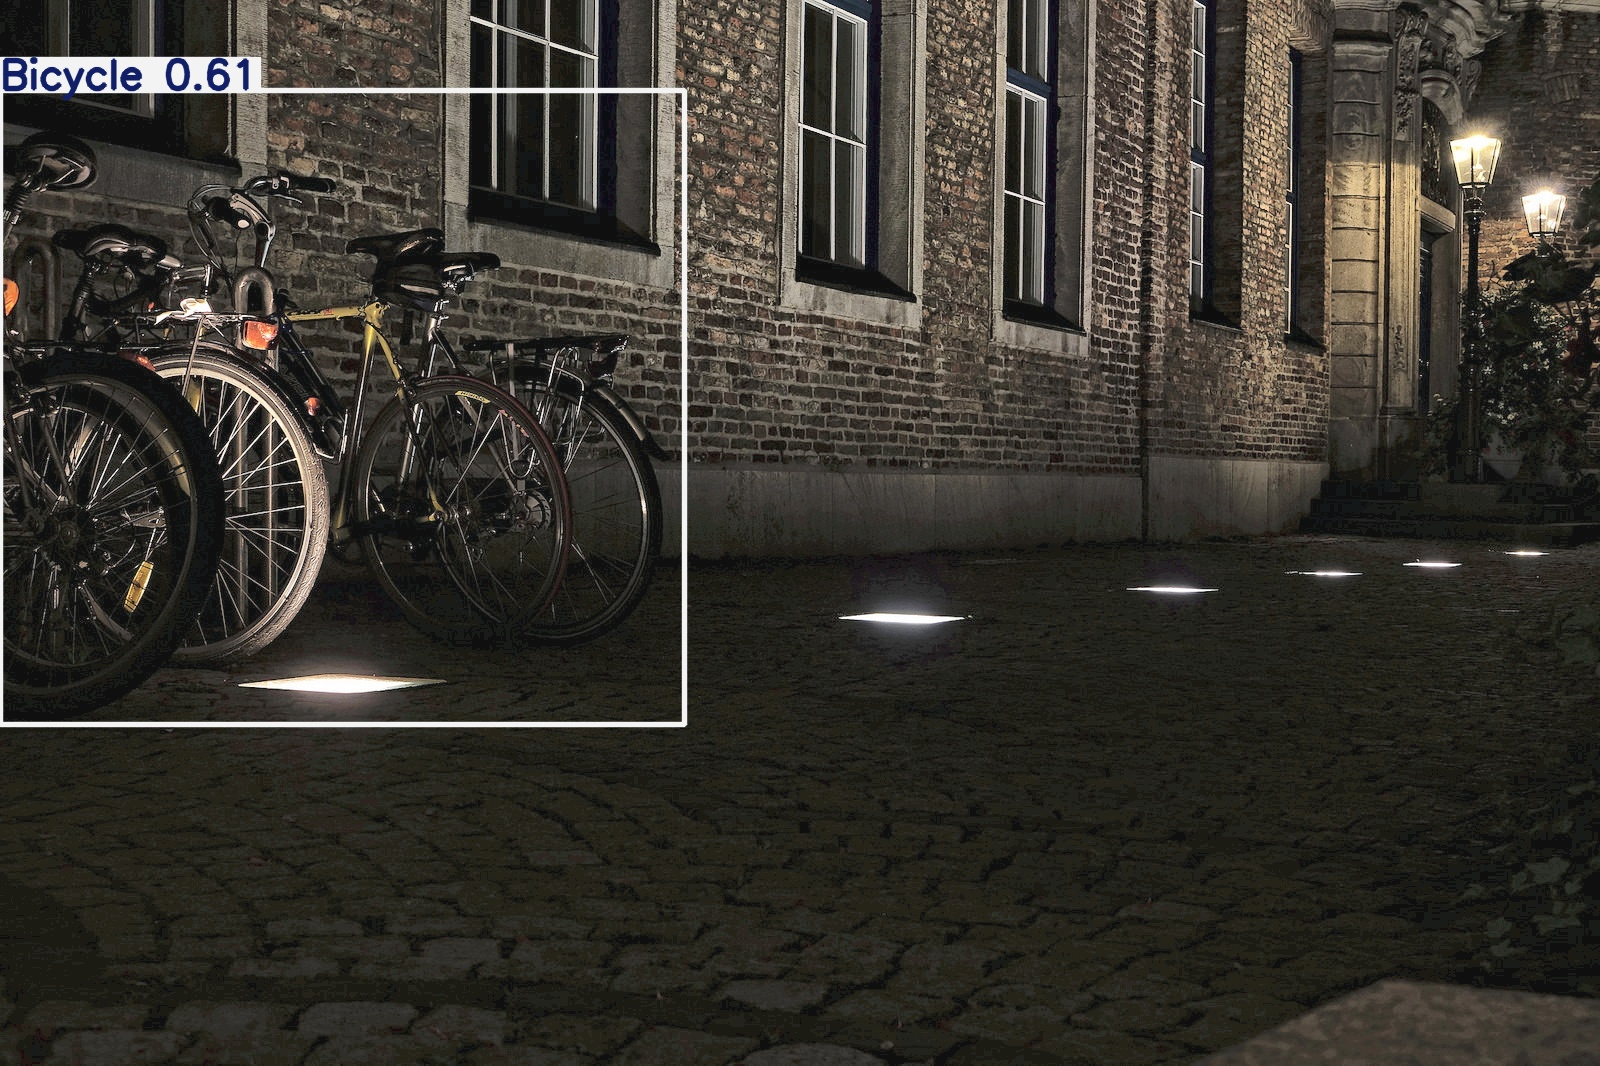

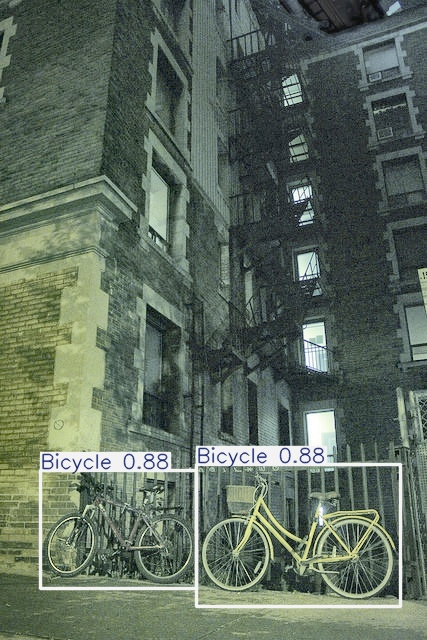

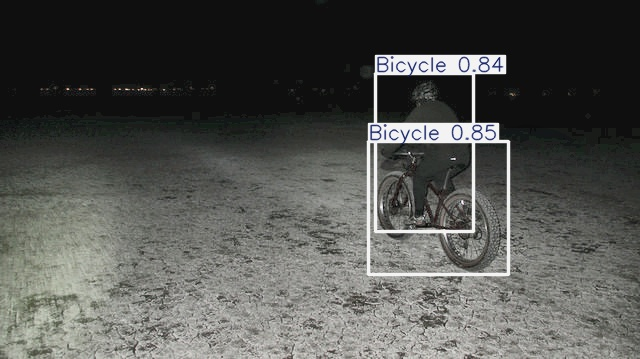

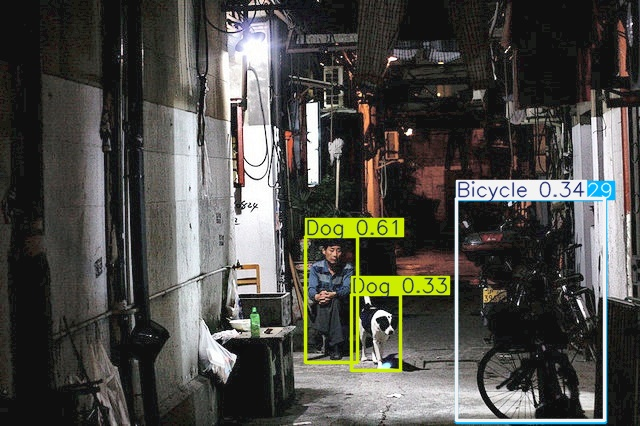

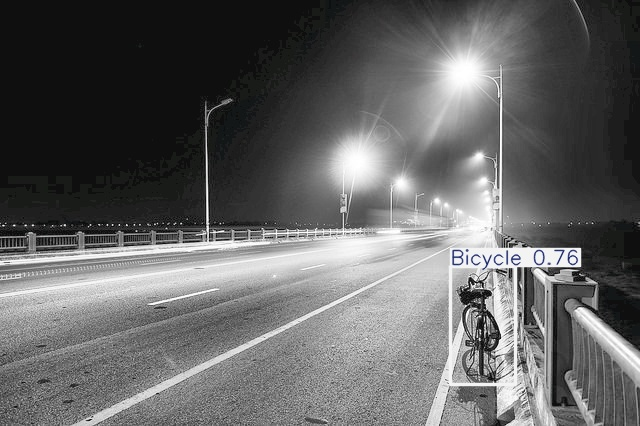

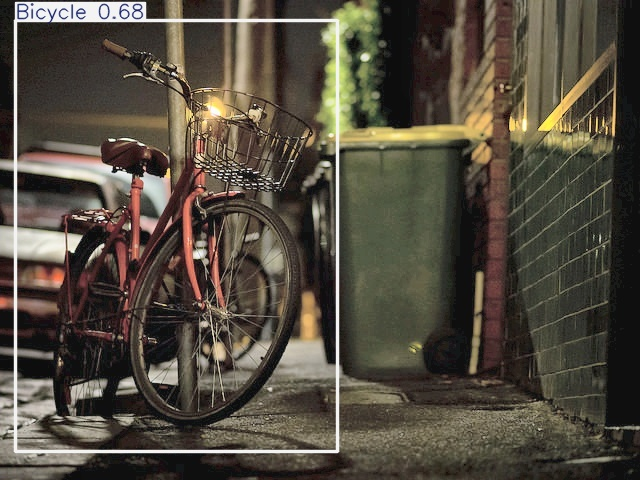

In [ ]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/predict"

# Show first 5 images
for i, filename in enumerate(sorted(os.listdir(pred_dir))[:20]):
    display(Image(filename=os.path.join(pred_dir, filename)))


In [2]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/predict"

# Show first 5 images
for i, filename in enumerate(sorted(os.listdir(pred_dir))[-5:]):
    display(Image(filename=os.path.join(pred_dir, filename)))


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict'

In [1]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/predict"

# Show first 5 images
for i, filename in enumerate(sorted(os.listdir(pred_dir))[:5]):
    display(Image(filename=os.path.join(pred_dir, filename)))


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict'